In [8]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict

In [ ]:
# define state
class BMIState(TypedDict):
    wt_kg:float
    ht_m:float
    bmi:float
    category:str

In [21]:
# after each node execution it gets the state of the graph
def Calulate_BMI(state:BMIState) -> BMIState:

    wt = state['wt_kg']
    ht = state['ht_m']

    bmi = wt / (ht ** 2)

    state['bmi'] = round(bmi,2)

    return state

In [24]:
def label_bmi(state:BMIState) -> BMIState:

    bmi = state['bmi']

    if(bmi < 18.5):
        state['category'] = "Underweight"
    elif 18.5 <= bmi <= 25:
        state['category'] = "Normal"
    elif  25 < bmi <= 30:
        state['category'] = "Overweight"
    else :
        state['category'] = "Obese"

    return state

In [28]:
# define Your Graph
graph = StateGraph(BMIState)

# add node to your graph
graph.add_node('Calulate_BMI', Calulate_BMI)

graph.add_node('label_bmi', label_bmi)

# add edges using string names
graph.add_edge(START, 'Calulate_BMI')
graph.add_edge('Calulate_BMI','label_bmi')
graph.add_edge('label_bmi',END)

# compile the graph
workflow = graph.compile()



In [33]:
# execute the graph
final_state = workflow.invoke({
    'wt_kg': 75,
    'ht_m': 1.75
})

print(final_state)

{'wt_kg': 75, 'ht_m': 1.75, 'bmi': 24.49, 'category': 'Normal'}


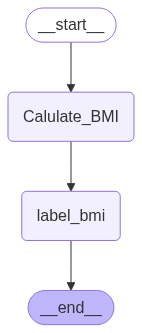

In [30]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())